In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Caso ideal

Para analizar este caso, simulé el circuito ideal en el LTSpice

![circ1.jpg](../../Apuntes/inducción/images/circ1.jpg)

In [17]:
df = pd.read_csv('data/ind_ideal.txt', 
                 sep='\t|,',  
                 engine='python',  
                 skiprows=1, 
                 names=['f', 'Tr', 'Ti'],
                 dtype='float'
)

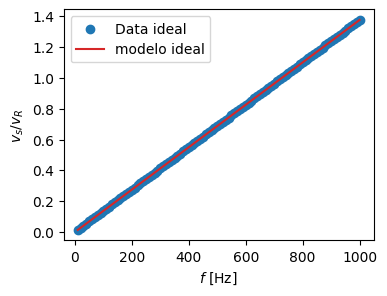

In [ ]:
# Valores de los componentes utilizados
R=100
L1= 10e-3
L2= 50e-3
k = 0.98

M= k*np.sqrt( L1*L2 )

T_exp = abs(df["Tr"]+ 1j*df["Ti"])
T_mod = lambda f: (M/R)*2*np.pi*f


#plot
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter( df["f"],T_exp , label="Data ideal")

ax.plot( df["f"], T_mod( df["f"] ), c='C3', label='modelo ideal' )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$v_s/v_R$ ")
ax.legend()
plt.show()

vemos que el model funciona Ok!

### Caso No ideal

El tema es que a frecuencias altas apareceran no linealidades, resonancias espureas, saturaciones etc. 
Por ejemplo miren el sigiente set de datos,

In [ ]:
df2 = pd.read_csv('data/induc_paras_2.txt', 
                 sep='\t|,',  
                 engine='python',  
                 skiprows=1, 
                 names=['f', 'Tr', 'Ti'],
                 dtype='float'
)

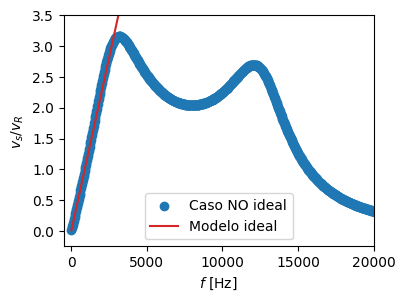

In [24]:

R=100
L1= 10e-3
L2= 50e-3
k = 0.8

M= k*np.sqrt( L1*L2 )

fig,ax = plt.subplots(figsize=(4,3))

T = abs(df2["Tr"]+ 1j*df2["Ti"])

ax.scatter( df2["f"],T , label='Caso NO ideal')

ax.plot( df2["f"], T_mod( df2["f"] ), c='C3' , label='Modelo ideal')

ax.set_xlim((-500,20000))
ax.set_ylim((-0.25,3.5))
ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$v_s/v_R$ ")
ax.legend()
plt.show()

Las no linearidades aparecen por efectos parásitos en el sistema, estos se pueden modelar. Ver el script [Induccion modelo realista](Induccion_Modelo_Realista.ipynb) para un ejemplo